In [29]:
import csv
import networkx as nx
import numpy as np

G = nx.Graph()
with open('phylo.csv') as csvfile:
    datareader = csv.reader(csvfile)
    for row in datareader:
        #print(row)
        G.add_edge(row[0],row[1],weight=float(row[2]))

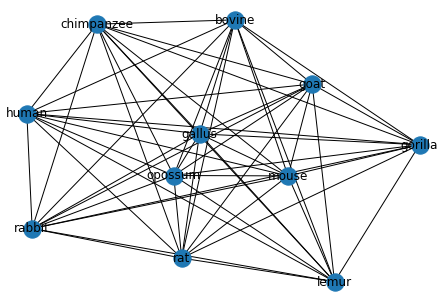

In [30]:
pos=nx.spring_layout(G)
nx.draw(G,pos,with_labels=True)

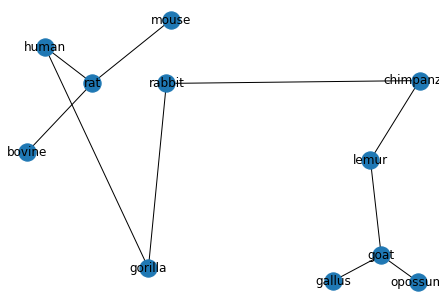

In [21]:
T=nx.minimum_spanning_tree(G)
nx.draw(T,with_labels=True)

In [31]:
def get_MST_clusters(G, k):
    H=nx.minimum_spanning_tree(G)
    for i in range(k-1):
        removeEdge=max(dict(H.edges).items(), key=lambda x: x[1]['weight'])
        H.remove_edge(removeEdge[0][0], removeEdge[0][1])
    return H

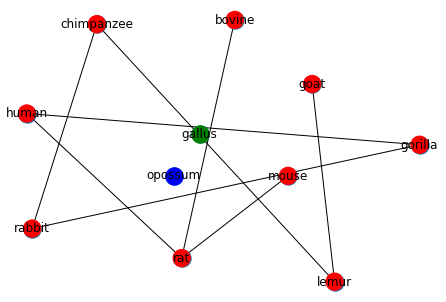

In [32]:
k=3
T=get_MST_clusters(G,k)
nx.draw(T,pos,with_labels=True)

color=['r', 'g', 'b', 'k', 'y', 'o', 'p']

iter=0
for g in nx.connected_components(T):
    nx.draw_networkx_nodes(T,pos, nodelist=list(g), node_color=[color[iter]]*len(list(g)))
    iter+=1

In [33]:
print(list(nx.connected_components(T)))

[{'mouse', 'rabbit', 'gorilla', 'human', 'goat', 'lemur', 'rat', 'bovine', 'chimpanzee'}, {'gallus'}, {'opossum'}]
